Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
6. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
7. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [103]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [104]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [106]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [107]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

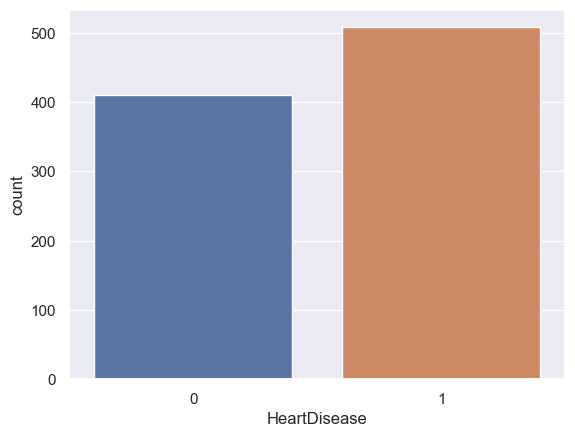

In [108]:
sns.countplot(x='HeartDisease', data=df)

In [109]:
df['Sex'] = df['Sex'].map({'M':0,'F':1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [110]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [111]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [112]:
df['RestingECG'] = df['RestingECG'].map({'Normal':0,'LVH':1,'ST':2})

In [113]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [114]:
df['ExerciseAngina']  = df['ExerciseAngina'].map({'N':0,'Y':1})

In [115]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [116]:
df['ST_Slope'] = df['ST_Slope'].map({'Up':0,'Flat':1,'Down':2})

In [117]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,0,172,0,0.0,0,0
1,49,1,NAP,160,180,0,0,156,0,1.0,1,1
2,37,0,ATA,130,283,0,2,98,0,0.0,0,0
3,48,1,ASY,138,214,0,0,108,1,1.5,1,1
4,54,0,NAP,150,195,0,0,122,0,0.0,0,0


In [118]:
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,1,0
2,37,0,130,283,0,2,98,0,0.0,0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,0,132,0,1.2,1,1,0,0,1
914,68,0,144,193,1,0,141,0,3.4,1,1,0,0,0
915,57,0,130,131,0,0,115,1,1.2,1,1,0,0,0
916,57,1,130,236,0,1,174,0,0.0,1,1,1,0,0


In [119]:
df_dummies.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,0.592593,136.809368,0.404139,0.887364,0.638344,0.553377,0.188453,0.221133,0.050109
std,9.432617,0.407701,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.607056,0.497414,0.391287,0.415236,0.218289
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df_dummies.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,1,0
2,37,0,130,283,0,2,98,0,0.0,0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,0,1,0


In [121]:
df1 = df_dummies.copy()

In [122]:
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,1,0
2,37,0,130,283,0,2,98,0,0.0,0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,0,1,0


In [123]:
df1[df1['RestingBP']>(df1['RestingBP'].mean()+3*df1['RestingBP'].std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
109,39,0,190,241,0,0,106,0,0.0,0,0,1,0,0
241,54,0,200,198,0,0,142,1,2.0,1,1,0,0,0
365,64,1,200,0,0,0,140,1,1.0,1,1,0,0,0
399,61,0,200,0,1,2,70,0,0.0,1,1,0,1,0
592,61,0,190,287,1,1,150,1,2.0,2,1,0,0,0
732,56,1,200,288,1,1,133,1,4.0,2,1,0,0,0
759,54,0,192,283,0,1,195,0,0.0,0,1,1,0,0


In [124]:
df2 =df1[df1['RestingBP']<(df1['RestingBP'].mean()+3*df1['RestingBP'].std())]

In [125]:
df2.shape

(911, 14)

In [126]:
df2[df2['Cholesterol']>(df2['Cholesterol'].mean()+3*df2['Cholesterol'].std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
76,32,0,118,529,0,0,130,0,0.0,1,1,0,0,0
149,54,0,130,603,1,0,125,1,1.0,1,1,0,0,0
616,67,1,115,564,0,1,160,0,1.6,1,0,0,1,0


In [127]:
df3 = df2[df2['Cholesterol']<(df2['Cholesterol'].mean()+3*df2['Cholesterol'].std())]

In [128]:
df3.shape

(908, 14)

In [129]:
df3.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.503304,0.209251,131.943833,197.692731,0.231278,0.592511,136.828194,0.403084,0.884361,0.634361,0.550661,0.188326,0.221366,0.050661
std,9.421233,0.406998,17.731059,107.396068,0.421882,0.794988,25.389517,0.490788,1.064252,0.605568,0.497701,0.391188,0.415395,0.219425
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,222.000000,0.000000,0.000000,138.000000,0.000000,0.550000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
df3[df3['MaxHR']>(df3['MaxHR'].mean()+3*df3['MaxHR'].std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA


In [131]:
df3[df3['Oldpeak']>(df3['Oldpeak'].mean()+3*df3['Oldpeak'].std())]

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
166,50,0,140,231,0,2,140,1,5.0,1,1,0,0,0
702,59,0,178,270,0,1,145,0,4.2,2,0,0,0,1
771,55,0,140,217,0,0,111,1,5.6,2,1,0,0,0
791,51,0,140,298,0,0,122,1,4.2,1,1,0,0,0
850,62,1,160,164,0,1,145,0,6.2,2,1,0,0,0
900,58,0,114,318,0,2,140,0,4.4,2,1,0,0,0


In [132]:
df4 = df3[df3['Oldpeak']<(df3['Oldpeak'].mean()+3*df3['Oldpeak'].std())]

In [133]:
df4.shape

(902, 14)

In [134]:
df4.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,53.487805,0.209534,131.854767,197.347007,0.232816,0.589800,136.848115,0.402439,0.857428,0.627494,0.548780,0.189579,0.222838,0.049889
std,9.444115,0.407202,17.682612,107.585613,0.422860,0.794142,25.451226,0.490662,1.013157,0.600442,0.497891,0.392185,0.416381,0.217837
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,222.000000,0.000000,0.000000,138.000000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000


c:\ProgramData\Miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

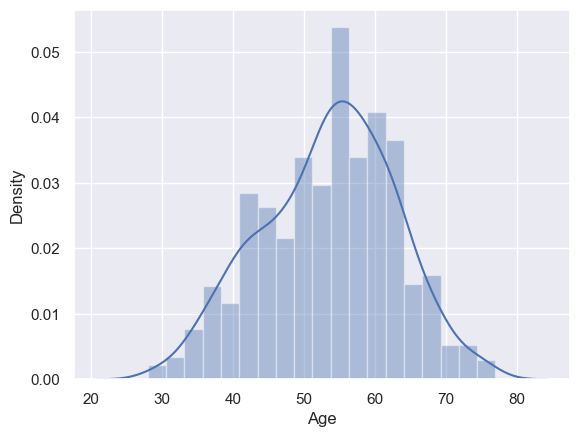

In [135]:
sns.distplot(df4['Age'])

c:\ProgramData\Miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

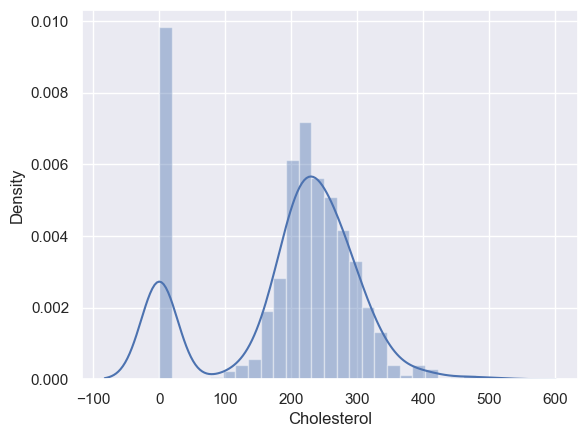

In [136]:
sns.distplot(df4['Cholesterol'])

c:\ProgramData\Miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

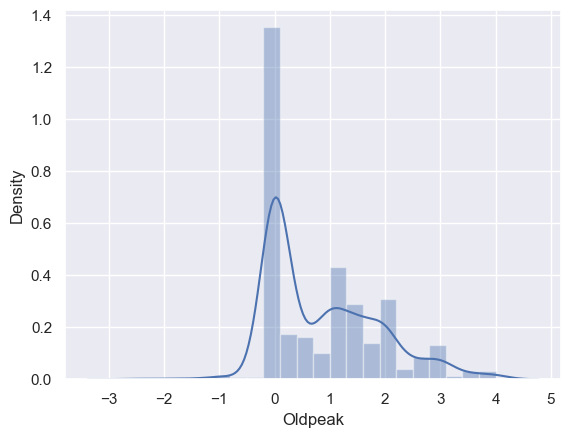

In [137]:
sns.distplot(df4['Oldpeak'])

In [138]:
df4.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,1,0
2,37,0,130,283,0,2,98,0,0.0,0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,0,1,0


In [139]:
X = df4.drop('HeartDisease',axis=1)
y = df4['HeartDisease']

In [140]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,0,1,0
2,37,0,130,283,0,2,98,0,0.0,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,0,0,1,0


In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=42)

Standalone SVC

In [144]:
from sklearn.svm import SVC

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
clf_model = cross_val_score(SVC(), X,y,cv=5)
clf_model

array([0.62430939, 0.79558011, 0.68888889, 0.72777778, 0.61666667])

In [147]:
clf_model.mean()

0.6906445672191528

Using Bagging SVC

In [148]:
from sklearn.ensemble import BaggingClassifier

In [151]:
bag_model = BaggingClassifier(
  base_estimator=SVC(),
  n_estimators=100,
  max_samples=0.8,
  random_state=0
)
clf = cross_val_score(bag_model, X,y,cv=5)

In [152]:
clf.mean()

0.6839656230816453

As you can see above, using bagging in case of SVM doesn't make much difference in terms of model accuracy. Bagging is effective when we have high variance and instable model such as decision tree. Let's explore how bagging changes the performance for a decision tree classifier.


Decision Tree Classifier

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
clf_model = cross_val_score(DecisionTreeClassifier(random_state=0), X,y,cv=5)
clf_model

array([0.78453039, 0.79005525, 0.77222222, 0.67777778, 0.65      ])

In [161]:
clf_model.mean()

0.7349171270718231

In [163]:
bag_model = BaggingClassifier(
  base_estimator=DecisionTreeClassifier(),
  n_estimators=100,
  max_samples=0.8,
  oob_score=True,
  random_state=0
)
clf_model = cross_val_score(bag_model, X,y,cv=5)

In [164]:
clf_model.mean()

0.798146101903008

Now let's use Random Forest Classifier which itself use bagging technique to build multiple decision trees and then combine them to get the final prediction.

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
clf_model = cross_val_score(RandomForestClassifier(), X,y,cv=5)
clf_model

array([0.85082873, 0.81767956, 0.82777778, 0.83333333, 0.76111111])

In [167]:
clf_model.mean()

0.8181461019030081